# Project 1: Basic plotting in Python 3 with matplotlib.pyplot

Parampreet SINGH, C19377466

# General Rules of the Project Submission

Python 3 and [Matplotlib](https://matplotlib.org/) will be used throughout the semseter, so it is important to be familiar with them. It is strongly suggested to go through [Stanford CS231n](http://cs231n.github.io/python-numpy-tutorial/) and [CS228](https://github.com/kuleshov/cs228-material/blob/master/tutorials/python/cs228-python-tutorial.ipynb) for more detailed Python and numpy tutorials if you haven't had used Python before. 

In some cells and files you will see code blocks that look like this:

```python
##############################################################################
#                    TODO: Write the equation for a line                     #
##############################################################################
pass
##############################################################################
#                              END OF YOUR CODE                              #
##############################################################################
```

You should replace the `pass` statement with your own code and leave the blocks intact, like this:

```python
##############################################################################
#                    TODO: Write the equation for a line                     #
##############################################################################
y = m * x + b
##############################################################################
#                              END OF YOUR CODE                              #
##############################################################################
```

When completing the notebook, please adhere to the following rules:
- Do not write or modify any code outside of code blocks
- Follow the instruction of the project description carefully
- Run all cells before submitting. <span style="color:red">**You will only get credit for code that has been run!**.</span>

The last point is extremely important and bears repeating:

### We will not re-run your notebook -- <span style="color:red">you will only get credit for cells that have been run</span>

### File name
Your Python program should be named **yourlastname_yourfirstname_P1.ipynb**, then zip it and upload to Canvas

# Python 3

If you're unfamiliar with Python 3, here are some of the most common changes from Python 2 to look out for.

### Print is a function

In [1]:
print("Hello!")

Hello!


Without parentheses, printing will not work.

### Floating point division by default

In [2]:
5 / 2

2.5

To do integer division, we use two backslashes:

In [3]:
5 // 2

2

### No xrange

The xrange from Python 2 is now merged into "range" for Python 3 and there is no xrange in Python 3. In Python 3, range(3) does not create a list of 3 elements as it would in Python 2, rather just creates a more memory efficient iterator.

Hence,
xrange in Python 3: Does not exist
range in Python 3: Has very similar behavior to Python 2's xrange

In [4]:
for i in range(3):
    print(i)

0
1
2


In [5]:
range(3)

range(0, 3)

In [6]:
# If need be, can use the following to get a similar behavior to Python 2's range:
print(list(range(3)))

[0, 1, 2]


# Project Description

## Data File

The first line of `IrisData.txt` contains two integers. The first represents how many lines of data are in the file. The second how many features are associated with each line. Each line after that contains four floating point values representing the sepal length, sepal width, petal length, and petal width of a type of iris flower, followed by the name of the iris type: either setosa, versicolor, or virginica. Values are tab separated.

## Python Program

Write a Python program that will print out a **two-dimensional plot** of any two features for all three varieties of iris flowers using the features of `matplotlib.pyplot`. Your program should begin by asking for the name of the input file. For example:
```python
Enter the name of your data file: Irisdata.txt
```

In [1]:
##############################################################################
#         TODO: Write the code for reading data from file                    #
##############################################################################
# Importing required libraries
import numpy as np
import matplotlib.pyplot as plt

# Opening file
input_file = input("Enter the name of your data file:")
open_file = open(input_file, "r")

# Reading file
line_1 = open_file.readline()

# Converting line 1 of file into list with integer values
line_1_int = [int(x) for x in line_1.split("\t")]

# Add 1 to 2nd column as python excludes upper limit while using range function
line_1_int[1] = line_1_int[1]+1

# Create an 2-D array of zeros with rows and columns as per file data distribution
data = np.zeros([line_1_int[0],line_1_int[1]], dtype = object)

# Filling file data into the 2D array
for i in range(line_1_int[0]):
    data_string = open_file.readline()
    t = data_string.split("\t")
    
    for j in range(line_1_int[1]):
        
        # Put first 4 columns of array as floating point numbers and last column of array as string containg iris type
        if j < 4:
            data[i,j] = float(t[j])
        else:
            data[i,j] = t[j].strip() 

# Close the file
open_file.close()

##############################################################################
#                              END OF YOUR CODE                              #
##############################################################################

Enter the name of your data file:Irisdata.txt


Then the program should prompt the user for two features to plot. For example, it could say:
```
You can do a plot of any two features of the Iris Data set The feature codes are:
0 = sepal length
1 = sepal width
2 = petal length
3 = petal width
```
```python
Enter feature code For the horizontal axis: 0
Enter feature code For the vertical axis: 1
```

In [4]:
##############################################################################
#   TODO: Write the function for plotting using two features of the data     #
##############################################################################
def plot_feature_map():
    print("You can do a plot of any two features of the Iris Data set. The feature codes are: \n"
    "0 = sepal length \n"
    "1 = sepal width \n"
    "2 = petal length\n"
    "3 = petal width")
    
    # Get user inputs for feature codes
    horizontal_axis = int(input("Enter feature code For the horizontal axis:"))
    vertical_axis = int(input("Enter feature code For the vertical axis:"))
    
    # Plot data using scatter plot from matplotlib library
    for i in range(line_1_int[0]):
        if data[i,4] == 'setosa':
            x = plt.scatter(data[i,horizontal_axis], data[i,vertical_axis], color = 'green', marker = 'v')
        elif data[i,4] == 'versicolor':
            y = plt.scatter(data[i,horizontal_axis], data[i,vertical_axis], color = 'blue', marker = 'o')
        else:
            z = plt.scatter(data[i,horizontal_axis], data[i,vertical_axis], color = 'red', marker = '+')
    
    axis_title = {0:'Sepal Length', 1:'Sepal Width', 2:'Petal Length', 3:'Petal Width'}
    plt.xlabel(f'{axis_title[horizontal_axis]}')
    plt.ylabel(f'{axis_title[vertical_axis]}')
    plt.title("Iris Flower Plot")
    plt.legend([x, y, z],["setosa", "versicolor", "virginica"])
    
    plt.savefig("foo.png", bbox_inches="tight")
    plt.show()

##############################################################################
#                              END OF YOUR CODE                              #
##############################################################################

Once the program does a plot it should ask the user if they want to another plot. For example:

> Would you like to do another plot? (y/n) `y`


If the answer is `y`, then the user should be prompted for new features to plot on the horizontal and vertical axes as before and a new plot generated. `n` should end the program.

Plots should be labelled with a *title, axes should be labelled*, there should be a *legend* and all three varieties should be **color coded** and have different symbols. An example is shown below.

![caption](https://nianyil.people.clemson.edu/CPSC_4430/P1.png)

You need to try **at least 3 plots with different x and y labels combination**.

You can do a plot of any two features of the Iris Data set. The feature codes are: 
0 = sepal length 
1 = sepal width 
2 = petal length
3 = petal width
Enter feature code For the horizontal axis:0
Enter feature code For the vertical axis:1


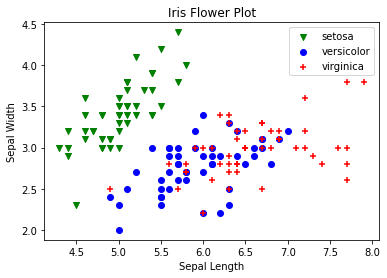

Would you like to do another plot? (y/n)Y
Invalid Input! Please choose from (y/n)
Would you like to do another plot? (y/n)y
You can do a plot of any two features of the Iris Data set. The feature codes are: 
0 = sepal length 
1 = sepal width 
2 = petal length
3 = petal width
Enter feature code For the horizontal axis:0
Enter feature code For the vertical axis:2


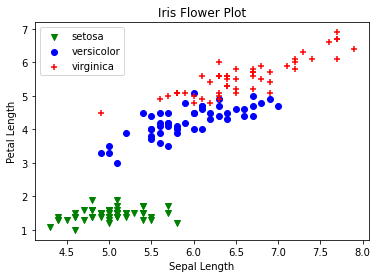

Would you like to do another plot? (y/n)y
You can do a plot of any two features of the Iris Data set. The feature codes are: 
0 = sepal length 
1 = sepal width 
2 = petal length
3 = petal width
Enter feature code For the horizontal axis:0
Enter feature code For the vertical axis:3


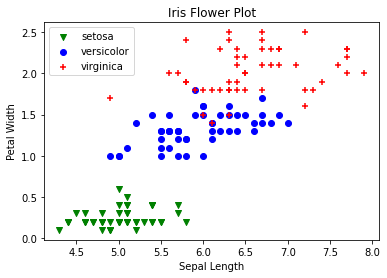

Would you like to do another plot? (y/n)y
You can do a plot of any two features of the Iris Data set. The feature codes are: 
0 = sepal length 
1 = sepal width 
2 = petal length
3 = petal width
Enter feature code For the horizontal axis:1
Enter feature code For the vertical axis:2


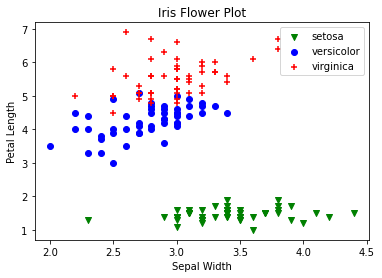

Would you like to do another plot? (y/n)y
You can do a plot of any two features of the Iris Data set. The feature codes are: 
0 = sepal length 
1 = sepal width 
2 = petal length
3 = petal width
Enter feature code For the horizontal axis:1
Enter feature code For the vertical axis:3


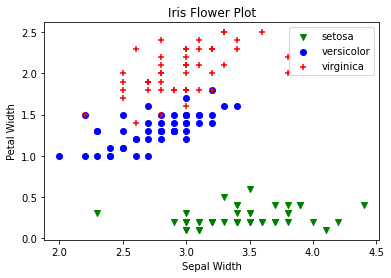

Would you like to do another plot? (y/n)y
You can do a plot of any two features of the Iris Data set. The feature codes are: 
0 = sepal length 
1 = sepal width 
2 = petal length
3 = petal width
Enter feature code For the horizontal axis:2
Enter feature code For the vertical axis:3


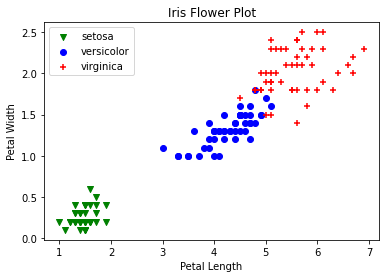

Would you like to do another plot? (y/n)n


In [6]:
## #          TODO: Use the loop function for plotting figures                 #
##############################################################################
ans = 'y'

# Call plotting function while user input is 'y'
while ans == 'y':
    plot_feature_map()

# Check to ensure user inputs either 'y' or 'n' only
    while True:
        ans = input("Would you like to do another plot? (y/n)")
        if ans in ['y', 'n']:
            break
        else:
            print("Invalid Input! Please choose from (y/n)")

##############################################################################
#                              END OF YOUR CODE                              #
##############################################################################

# Conclusion

Briefly discuss **which feature combination is the best** for classify the iris data.

**Your Answer:**  

The best feature combination for Iris Flower Plot is "Petal Length V/s Petal Width". This feature combination allows the user to visually distinguish between the three iris types. Also, for this feature combination, the datapoints are set apart in different (x,y) plot regions such as setosa lies within [(0,0),(2,0),(0,1),(2,1)] and so on and so forth.